Visualization
=============



In [1]:
import pandas as pd
import numpy as np
import pyarrow as pa

## Introduction



In [2]:
import matplotlib.pyplot as plt
plt.ion()

## Creating charts from aggregated data



### How to do it



In [3]:
ser = pd.Series(
    (x ** 2 for x in range(7)),
    name="book_sales",
    index=(f"Day {x + 1}" for x in range(7)),
    dtype=pd.Int64Dtype(),
)

ser

Day 1     0
Day 2     1
Day 3     4
Day 4     9
Day 5    16
Day 6    25
Day 7    36
Name: book_sales, dtype: Int64

<Axes: >

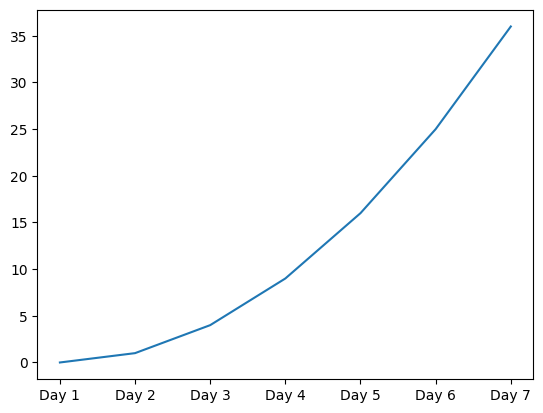

In [4]:
ser.plot()

<Axes: >

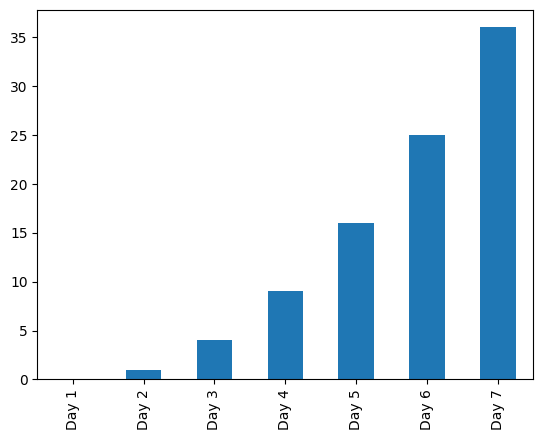

In [5]:
ser.plot(kind="bar")

<Axes: >

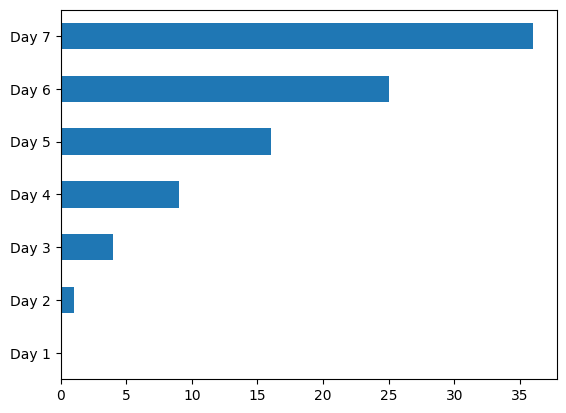

In [6]:
ser.plot(kind="barh")

<Axes: >

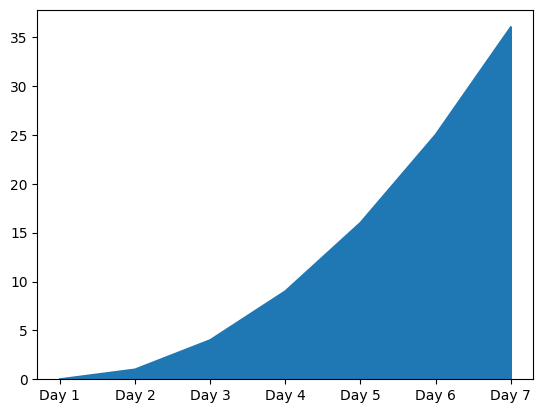

In [7]:
ser.plot(kind="area")

<Axes: ylabel='book_sales'>

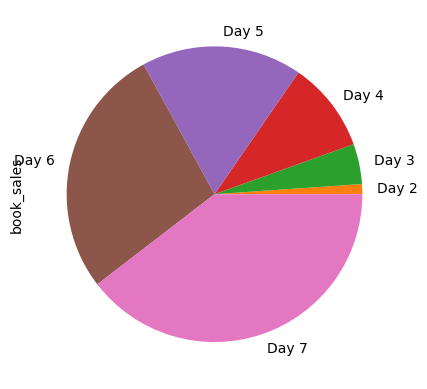

In [8]:
ser.plot(kind="pie")

In [9]:
df = pd.DataFrame({
    "book_sales": (x ** 2 for x in range(7)),
    "book_returns": [3, 2, 1, 0, 1, 2, 3],
}, index=(f"Day {x + 1}" for x in range(7)))
df = df.convert_dtypes(dtype_backend="numpy_nullable")

df

,book_sales,book_returns
Day 1,0,3
Day 2,1,2
Day 3,4,1
Day 4,9,0
Day 5,16,1
Day 6,25,2
Day 7,36,3


<Axes: >

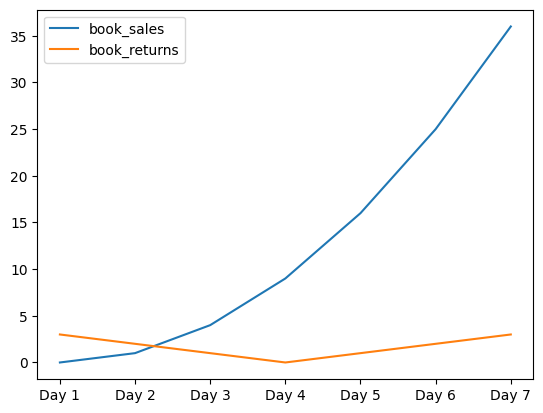

In [10]:
df.plot()

<Axes: >

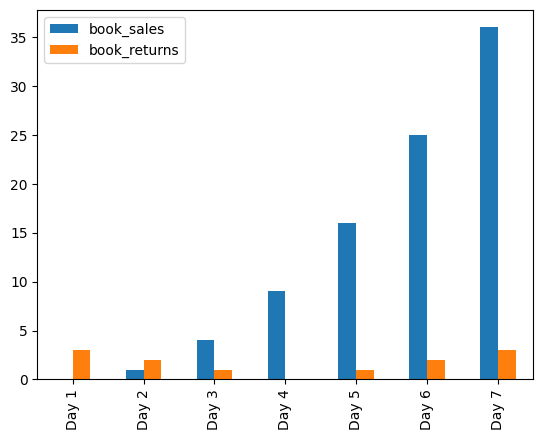

In [11]:
df.plot(kind="bar")

<Axes: >

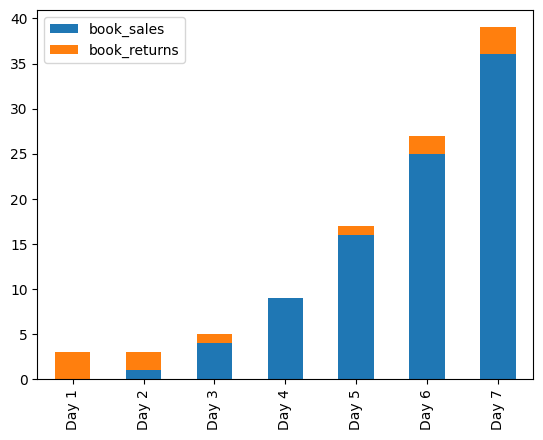

In [12]:
df.plot(kind="bar", stacked=True)

<Axes: >

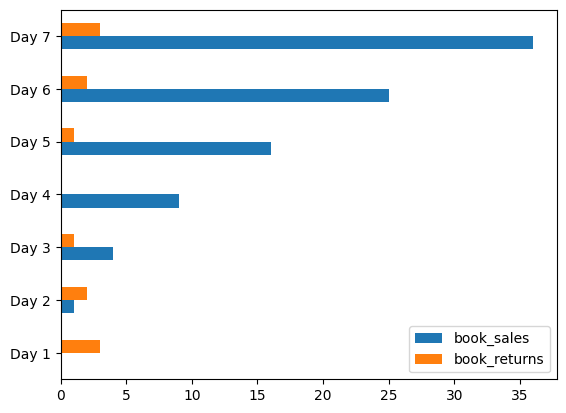

In [13]:
df.plot(kind="barh")

<Axes: >

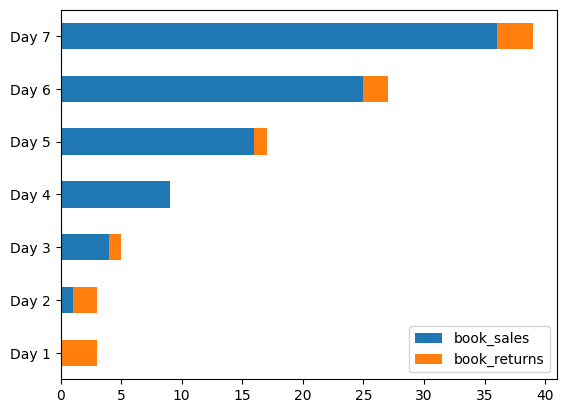

In [14]:
df.plot(kind="barh", stacked=True)

<Axes: >

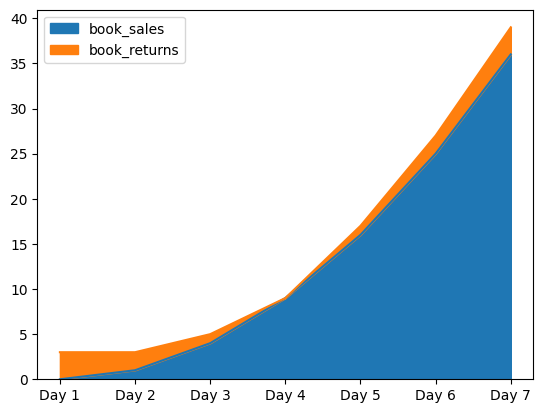

In [15]:
df.plot(kind="area")

<Axes: >

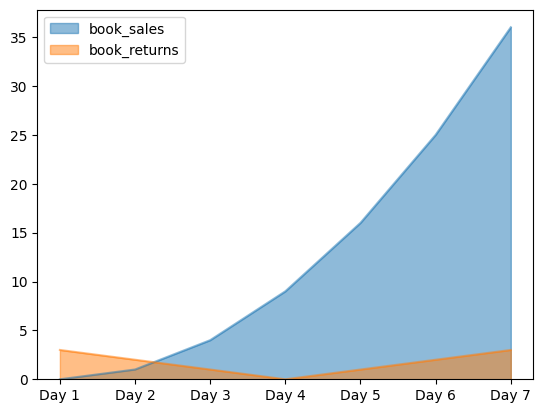

In [16]:
df.plot(kind="area", stacked=False, alpha=0.5)

### There's more&#x2026;



<Axes: title={'center': 'Book Sales by Day'}>

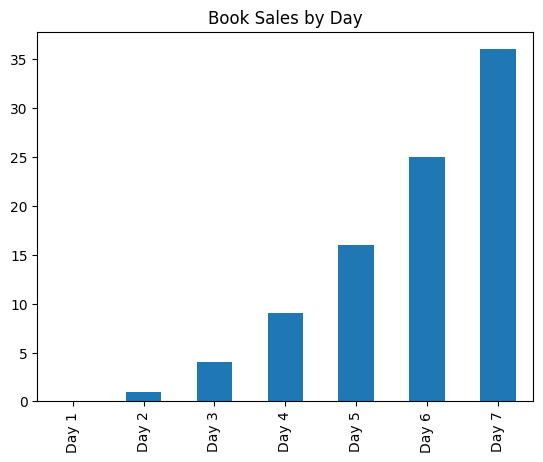

In [17]:
ser.plot(
    kind="bar",
    title="Book Sales by Day",
)

<Axes: title={'center': 'Book Sales by Day'}>

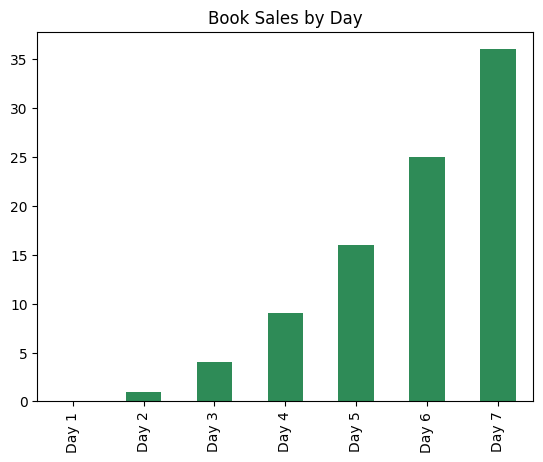

In [18]:
ser.plot(
    kind="bar",
    title="Book Sales by Day",
    color="seagreen",
)

<Axes: title={'center': 'Book Metrics'}>

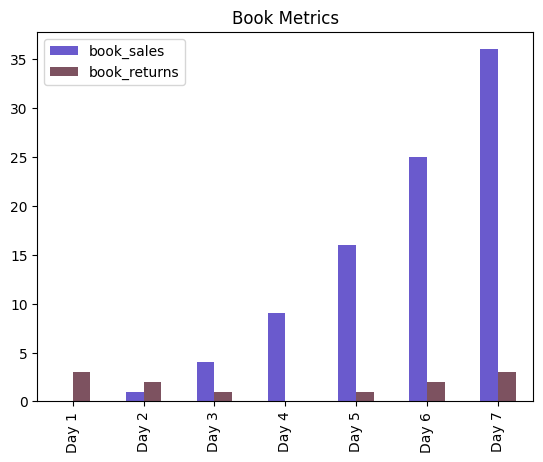

In [19]:
df.plot(
    kind="bar",
    title="Book Metrics",
    color={
        "book_sales": "slateblue",
        "book_returns": "#7D5260",
    }
)

<Axes: title={'center': 'Book Sales by Day'}>

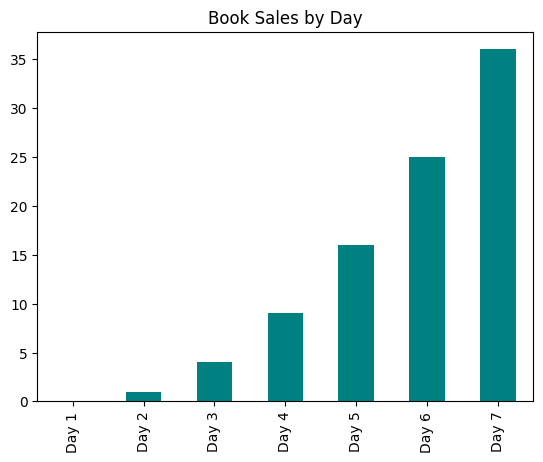

In [20]:
ser.plot(
    kind="bar",
    title="Book Sales by Day",
    color="teal",
    grid=False,
)

<Axes: title={'center': 'Book Sales by Day'}, xlabel='Day Number', ylabel='Book Sales'>

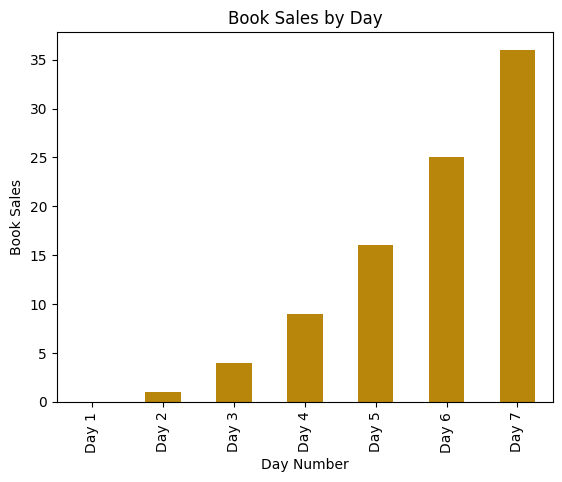

In [21]:
ser.plot(
    kind="bar",
    title="Book Sales by Day",
    color="darkgoldenrod",
    grid=False,
    xlabel="Day Number",
    ylabel="Book Sales",
)

array([<Axes: title={'center': 'book_sales'}>,
       <Axes: title={'center': 'book_returns'}>], dtype=object)

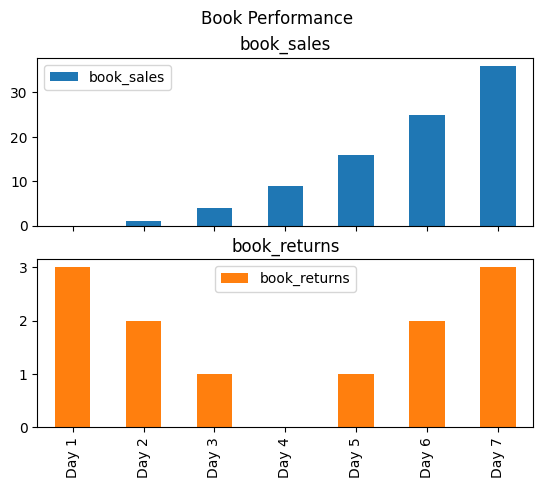

In [22]:
df.plot(
    kind="bar",
    title="Book Performance",
    grid=False,
    subplots=True,
)

array([<Axes: title={'center': 'book_sales'}>,
       <Axes: title={'center': 'book_returns'}>], dtype=object)

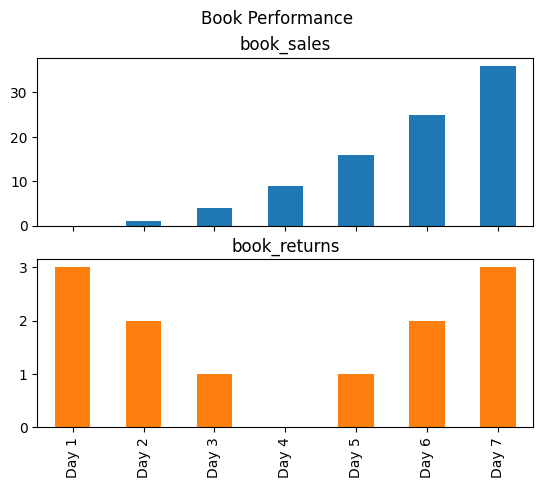

In [23]:
df.plot(
    kind="bar",
    title="Book Performance",
    grid=False,
    subplots=True,
    legend=False,
)

array([<Axes: title={'center': 'book_sales'}>,
       <Axes: title={'center': 'book_returns'}>], dtype=object)

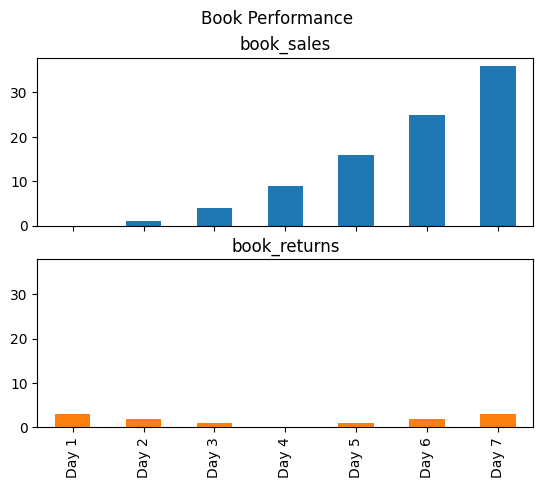

In [24]:
df.plot(
    kind="bar",
    title="Book Performance",
    grid=False,
    subplots=True,
    legend=False,
    sharey=True,
)

<Axes: title={'center': 'Book Returns'}>

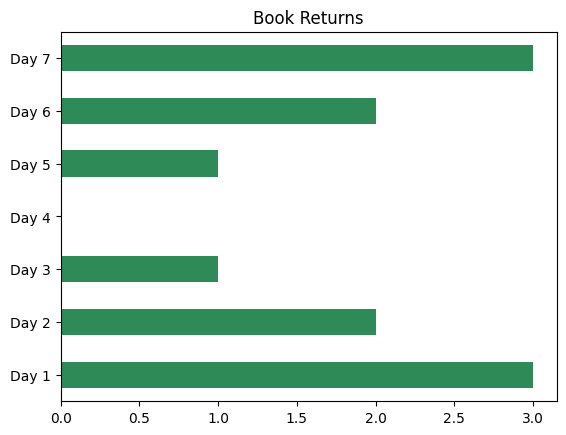

In [25]:
df.plot(
    kind="barh",
    y=["book_returns"],
    title="Book Returns",
    legend=False,
    grid=False,
    color="seagreen",
)

## Plotting distributions of non-aggregated data



### How to do it



In [26]:
np.random.seed(42)
ser = pd.Series(
    np.random.default_rng().normal(size=10_000),
    dtype=pd.Float64Dtype(),
)

ser

0      -0.119026
1       0.012644
2      -0.446498
3       0.338903
4        0.21263
          ...   
9995    0.667997
9996   -0.337248
9997    0.308333
9998     -1.0685
9999   -0.743394
Length: 10000, dtype: Float64

<Axes: ylabel='Frequency'>

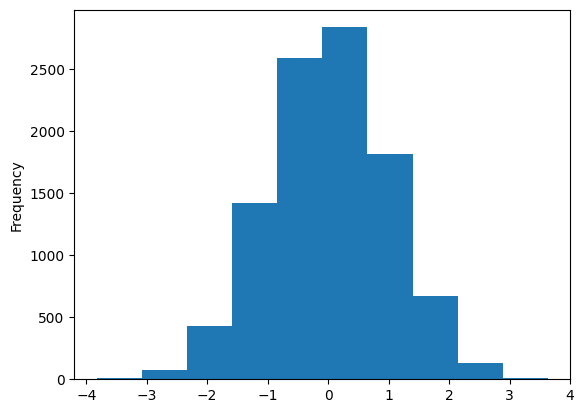

In [27]:
ser.plot(kind="hist")

<Axes: ylabel='Frequency'>

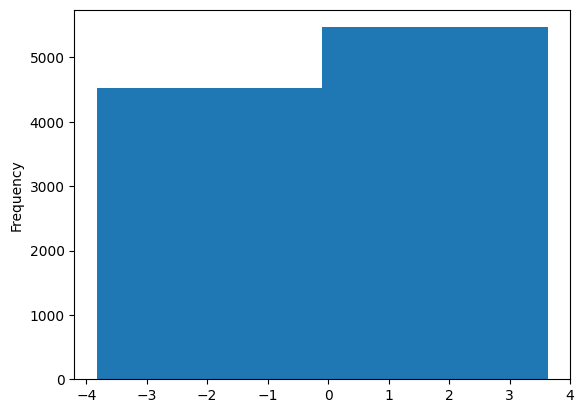

In [28]:
ser.plot(kind="hist", bins=2)

<Axes: ylabel='Frequency'>

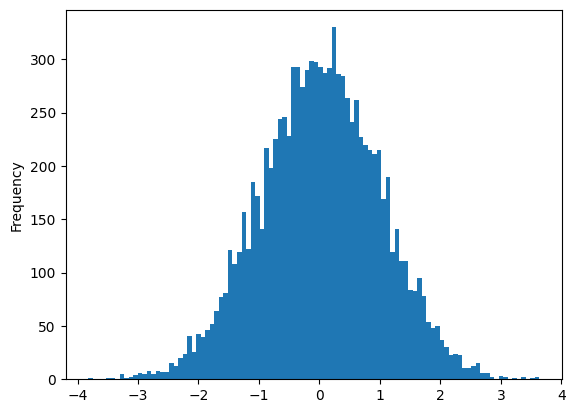

In [29]:
ser.plot(kind="hist", bins=100)

In [30]:
np.random.seed(42)
df = pd.DataFrame({
    "normal": np.random.default_rng().normal(size=10_000),
    "triangular": np.random.default_rng().triangular(-2, 0, 2, size=10_000),
})
df = df.convert_dtypes(dtype_backend="numpy_nullable")

df.head()

,normal,triangular
0,0.396798,-0.726775
1,-0.780034,0.854845
2,-0.170527,-0.077731
3,-1.145198,-0.943581
4,0.151527,-0.315225


<Axes: ylabel='Frequency'>

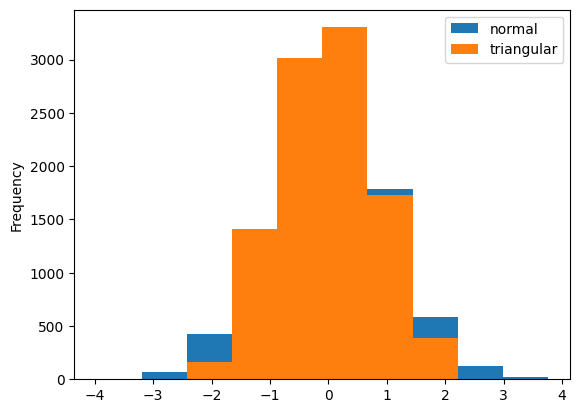

In [31]:
df.plot(kind="hist")

<Axes: ylabel='Frequency'>

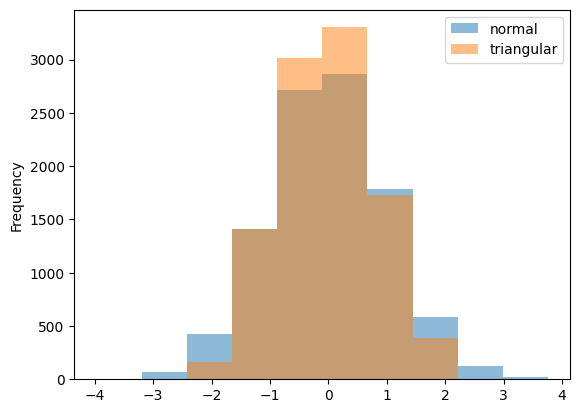

In [32]:
df.plot(kind="hist", alpha=0.5)

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

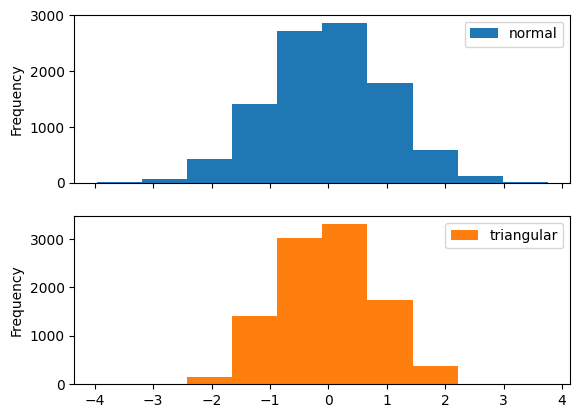

In [33]:
df.plot(kind="hist", subplots=True)

<Axes: ylabel='Frequency'>

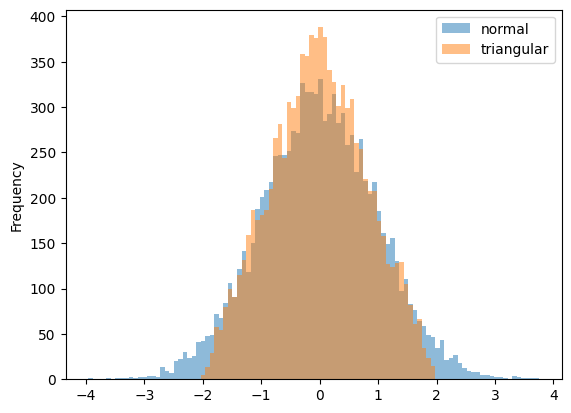

In [34]:
df.plot(kind="hist", alpha=0.5, bins=100)

<Axes: ylabel='Density'>

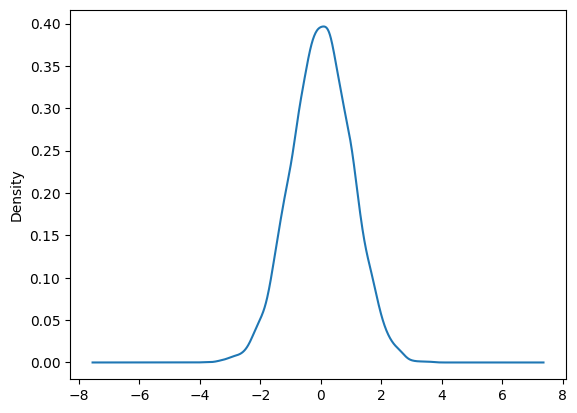

In [35]:
ser.plot(kind="kde")

<Axes: ylabel='Density'>

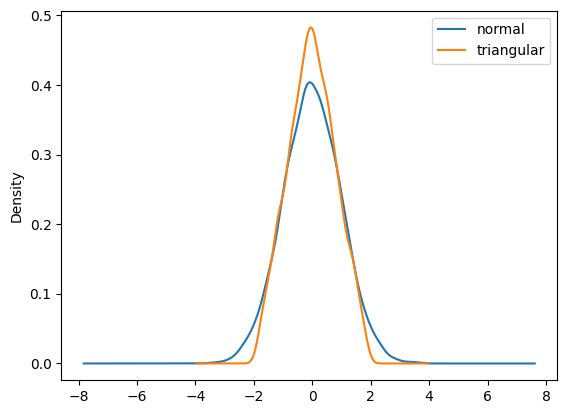

In [36]:
df.plot(kind="kde")

## Further plot customization with Matplotlib



### How to do it



<Axes: ylabel='book_sales'>

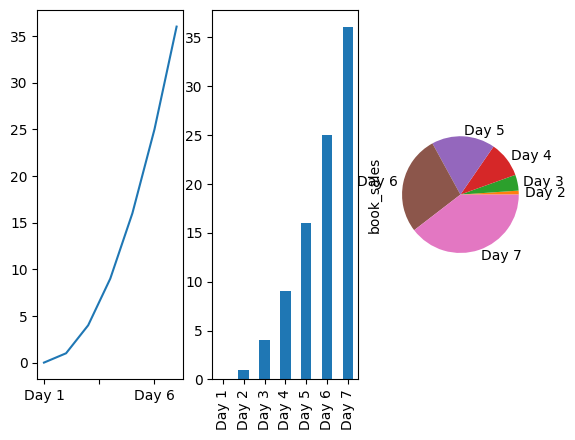

In [37]:
ser = pd.Series(
    (x ** 2 for x in range(7)),
    name="book_sales",
    index=(f"Day {x + 1}" for x in range(7)),
    dtype=pd.Int64Dtype(),
)
fig, axes = plt.subplots(nrows=1, ncols=3)
ser.plot(ax=axes[0])
ser.plot(kind="bar", ax=axes[1])
ser.plot(kind="pie", ax=axes[2])

<Axes: ylabel='book_sales'>

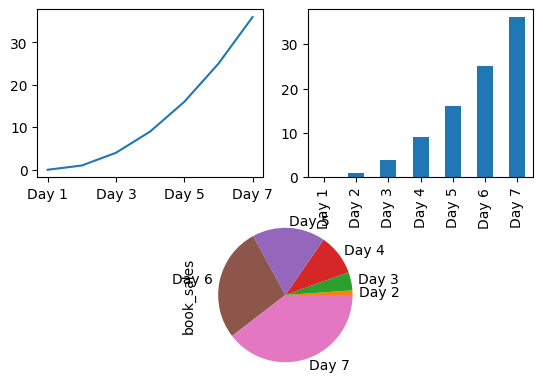

In [38]:
from matplotlib.gridspec import GridSpec

fig = plt.figure()
gs = GridSpec(2, 2, figure=fig)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, :])
ser.plot(ax=ax0)
ser.plot(kind="bar", ax=ax1)
ser.plot(kind="pie", ax=ax2)

Text(0, 0.5, '')

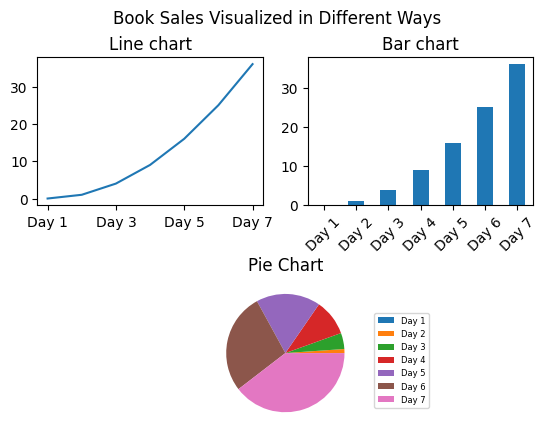

In [39]:
from matplotlib.gridspec import GridSpec

fig = plt.figure()
fig.suptitle("Book Sales Visualized in Different Ways")
gs = GridSpec(2, 2, figure=fig, hspace=.5)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, :])
ax0 = ser.plot(ax=ax0)
ax0.set_title("Line chart")

ax1 = ser.plot(kind="bar", ax=ax1)
ax1.set_title("Bar chart")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Remove labels from chart and show in custom legend instead
ax2 = ser.plot(kind="pie", ax=ax2, labels=None)
ax2.legend(
    ser.index,
    bbox_to_anchor=(1, -0.2, 0.5, 1),  # put legend to right of chart
    prop={"size": 6}, # set font size for legend
)
ax2.set_title("Pie Chart")
ax2.set_ylabel(None)  # remove book_sales label

## Scatter plots



### How to do it



In [40]:
df = pd.DataFrame({
    "var_a": [1, 2, 3, 4, 5],
    "var_b": [1, 2, 4, 8, 16],
    "var_c": [500, 200, 600, 100, 400],
    "var_d": ["blue", "orange", "gray", "blue", "gray"],
})
df = df.convert_dtypes(dtype_backend="numpy_nullable")

df

,var_a,var_b,var_c,var_d
0,1,1,500,blue
1,2,2,200,orange
2,3,4,600,gray
3,4,8,100,blue
4,5,16,400,gray


<Axes: xlabel='var_a', ylabel='var_b'>

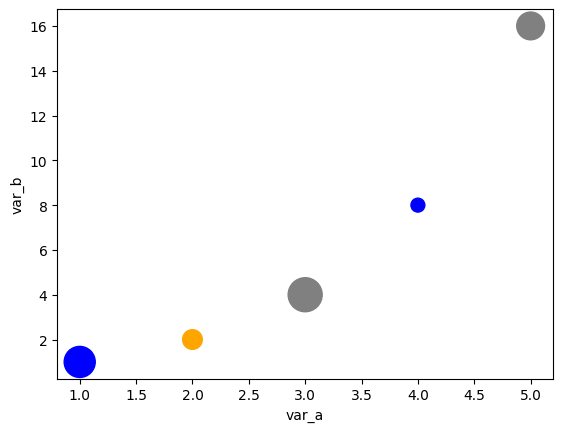

In [41]:
df.plot(
    kind="scatter",
    x="var_a",
    y="var_b",
    s="var_c",
    c="var_d",
)

In [43]:
df = pd.read_csv(
    "vehicles.csv.zip",
    dtype_backend="numpy_nullable",
    usecols=["city08", "highway08", "VClass", "fuelCost08", "year"],
)
df.head()

,city08,fuelCost08,highway08,VClass,year
0,19,2450,25,Two Seaters,1985
1,9,4700,14,Two Seaters,1985
2,23,1900,33,Subcompact Cars,1985
3,10,4700,12,Vans,1985
4,17,3400,23,Compact Cars,1993


In [44]:
car_classes = (
    "Subcompact Cars",
    "Compact Cars",
    "Midsize Cars",
    "Large Cars",
    "Two Seaters",
)
mask = (df["year"] >= 2015) & df["VClass"].isin(car_classes)
df = df[mask]
df.head()

,city08,fuelCost08,highway08,VClass,year
27058,16,3400,23,Subcompact Cars,2015
27059,20,2250,28,Compact Cars,2015
27060,26,1700,37,Midsize Cars,2015
27061,28,1600,39,Midsize Cars,2015
27062,25,1800,35,Midsize Cars,2015


<Axes: xlabel='city08', ylabel='highway08'>

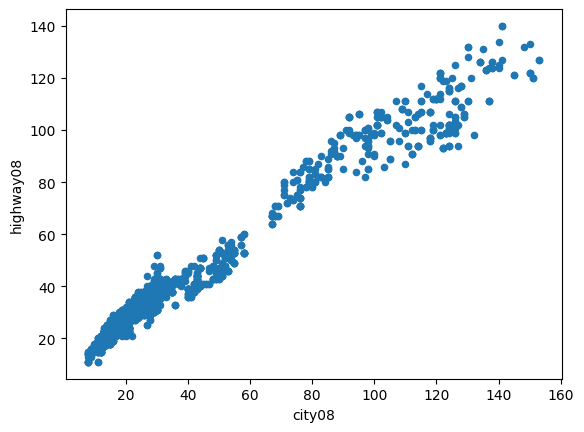

In [45]:
df.plot(
    kind="scatter",
    x="city08",
    y="highway08",
)

In [46]:
classes_ser = pd.Series(car_classes, dtype=pd.StringDtype())
cat = pd.CategoricalDtype(classes_ser)
df["VClass"] = df["VClass"].astype(cat)
df.head()

,city08,fuelCost08,highway08,VClass,year
27058,16,3400,23,Subcompact Cars,2015
27059,20,2250,28,Compact Cars,2015
27060,26,1700,37,Midsize Cars,2015
27061,28,1600,39,Midsize Cars,2015
27062,25,1800,35,Midsize Cars,2015


<Axes: xlabel='city08', ylabel='highway08'>

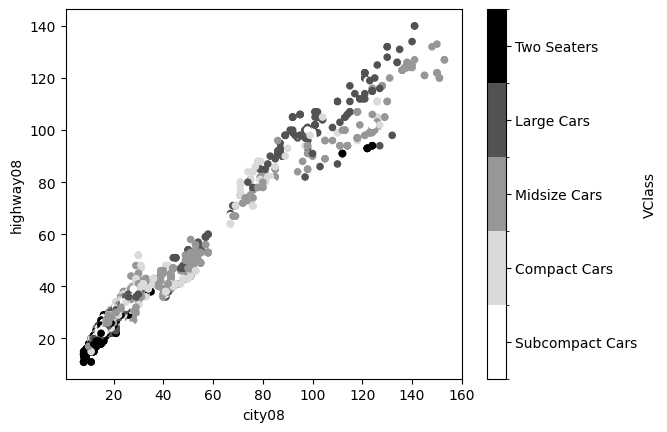

In [47]:
df.plot(
    kind="scatter",
    x="city08",
    y="highway08",
    c="VClass",
)

<Axes: xlabel='city08', ylabel='highway08'>

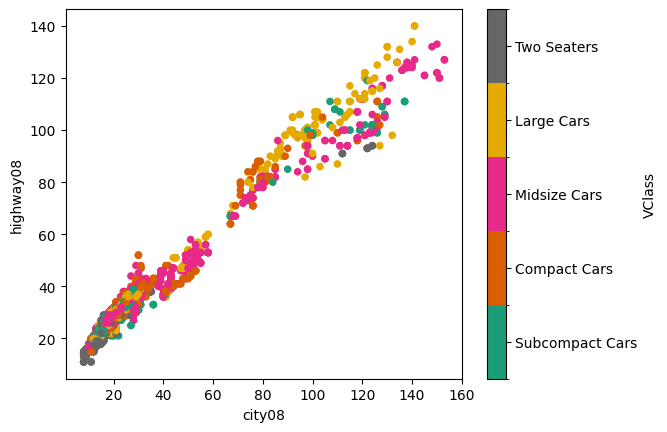

In [48]:
df.plot(
    kind="scatter",
    x="city08",
    y="highway08",
    c="VClass",
    colormap="Dark2",
)

<Axes: xlabel='city08', ylabel='highway08'>

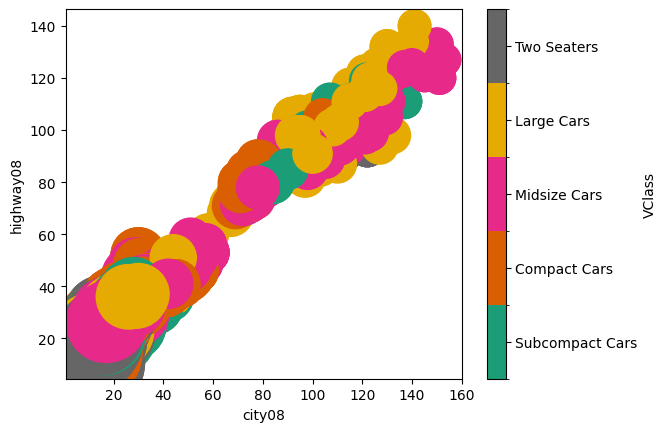

In [49]:
df.plot(
    kind="scatter",
    x="city08",
    y="highway08",
    c="VClass",
    colormap="Dark2",
    s="fuelCost08",
)

<Axes: xlabel='city08', ylabel='highway08'>

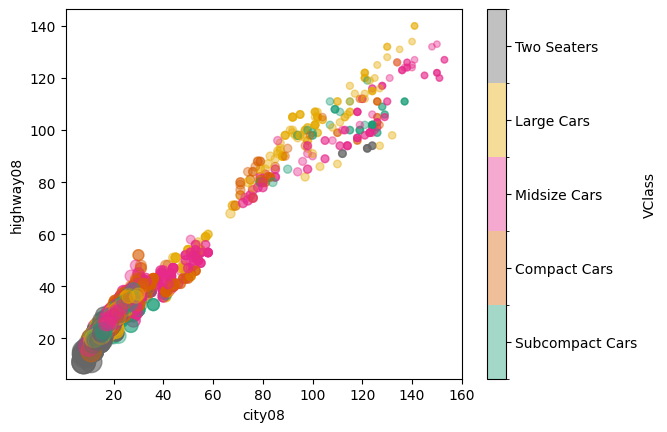

In [50]:
df.assign(
    scaled_fuel_cost=lambda x: x["fuelCost08"] / 25,
).plot(
    kind="scatter",
    x="city08",
    y="highway08",
    c="VClass",
    colormap="Dark2",
    s="scaled_fuel_cost",
    alpha=0.4,
)

### There's more&#x2026;



array([[<Axes: xlabel='city08', ylabel='city08'>,
        <Axes: xlabel='fuelCost08', ylabel='city08'>,
        <Axes: xlabel='highway08', ylabel='city08'>,
        <Axes: xlabel='year', ylabel='city08'>],
       [<Axes: xlabel='city08', ylabel='fuelCost08'>,
        <Axes: xlabel='fuelCost08', ylabel='fuelCost08'>,
        <Axes: xlabel='highway08', ylabel='fuelCost08'>,
        <Axes: xlabel='year', ylabel='fuelCost08'>],
       [<Axes: xlabel='city08', ylabel='highway08'>,
        <Axes: xlabel='fuelCost08', ylabel='highway08'>,
        <Axes: xlabel='highway08', ylabel='highway08'>,
        <Axes: xlabel='year', ylabel='highway08'>],
       [<Axes: xlabel='city08', ylabel='year'>,
        <Axes: xlabel='fuelCost08', ylabel='year'>,
        <Axes: xlabel='highway08', ylabel='year'>,
        <Axes: xlabel='year', ylabel='year'>]], dtype=object)

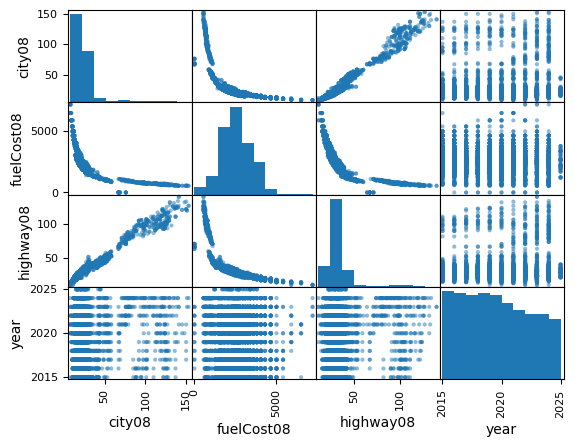

In [51]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)

## Exploring categorical data



### How to do it



In [ ]:
df = pd.read_csv(
    "vehicles.csv.zip",
    dtype_backend="numpy_nullable",
)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/vehicles.csv.zip'

In [52]:
df.iloc[:, [72, 74, 75, 77]]

,rangeA,mfrCode,c240Dscr,c240bDscr
0,<NA>,<NA>,<NA>,<NA>
1,<NA>,<NA>,<NA>,<NA>
2,<NA>,<NA>,<NA>,<NA>
3,<NA>,<NA>,<NA>,<NA>
4,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...
47518,<NA>,<NA>,<NA>,<NA>
47519,<NA>,<NA>,<NA>,<NA>
47520,<NA>,<NA>,<NA>,<NA>
47521,<NA>,<NA>,<NA>,<NA>


In [53]:
df["rangeA"].value_counts()

rangeA
290            74
270            58
280            56
310            41
277            38
               ..
240/290/290     1
395             1
258             1
256             1
230/350         1
Name: count, Length: 264, dtype: int64

In [54]:
df["rangeA"].str.isnumeric().idxmax()

7116

In [55]:
df.iloc[:, [74, 75, 77]].pipe(pd.isna).idxmin()

mfrCode      23147
c240Dscr     25661
c240bDscr    25661
dtype: int64

In [56]:
df = pd.read_csv(
    "data/vehicles.csv.zip",
    dtype_backend="numpy_nullable",
    dtype={
        "rangeA": pd.StringDtype(),
        "mfrCode": pd.StringDtype(),
        "c240Dscr": pd.StringDtype(),
        "c240bDscr": pd.StringDtype()
    }
)

df.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,14.167143,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,<NA>,<NA>,0.0,<NA>,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,<NA>,0,0,0
1,27.046364,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,<NA>,<NA>,0.0,<NA>,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,<NA>,0,0,0
2,11.018889,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,<NA>,<NA>,0.0,<NA>,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,<NA>,0,0,0
3,27.046364,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,<NA>,<NA>,0.0,<NA>,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,<NA>,0,0,0
4,15.658421,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,<NA>,<NA>,0.0,<NA>,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,<NA>,0,0,0


In [57]:
df.select_dtypes(include=["string"]).columns

Index(['drive', 'eng_dscr', 'fuelType', 'fuelType1', 'make', 'model',
       'mpgData', 'trany', 'VClass', 'baseModel', 'guzzler', 'trans_dscr',
       'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA', 'evMotor',
       'mfrCode', 'c240Dscr', 'c240bDscr', 'createdOn', 'modifiedOn',
       'startStop'],
      dtype='object')

In [58]:
df.select_dtypes(include=["string"]).nunique().sort_values()

sCharger         1
tCharger         1
startStop        2
mpgData          2
guzzler          3
fuelType2        4
c240Dscr         5
c240bDscr        7
drive            7
fuelType1        7
atvType          9
fuelType        15
VClass          34
trany           40
trans_dscr      52
mfrCode         56
make           144
rangeA         245
modifiedOn     298
evMotor        400
createdOn      455
eng_dscr       608
baseModel     1451
model         5064
dtype: int64

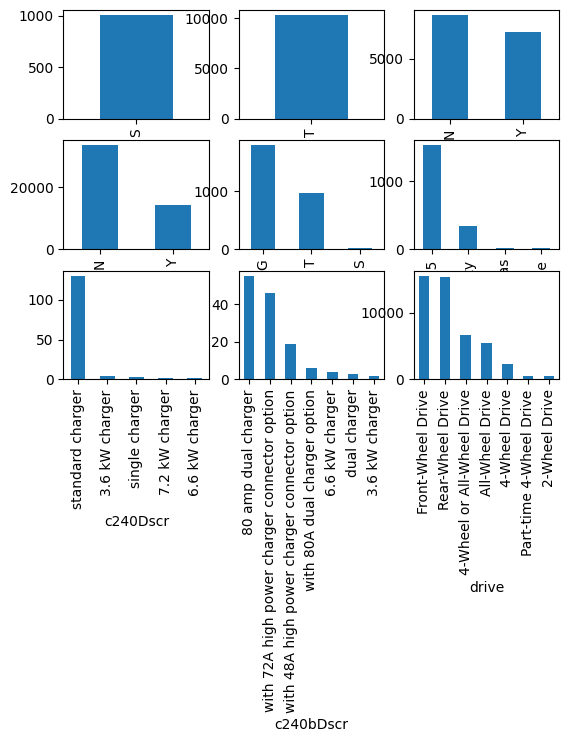

In [59]:
low_card = df.select_dtypes(include=["string"]).nunique().sort_values().iloc[:9].index
fig, axes = plt.subplots(nrows=3, ncols=3)

for index, column in enumerate(low_card):
    row, col = divmod(index, 3)
    ax = axes[row][col]
    df[column].value_counts().plot(kind="bar", ax=ax)

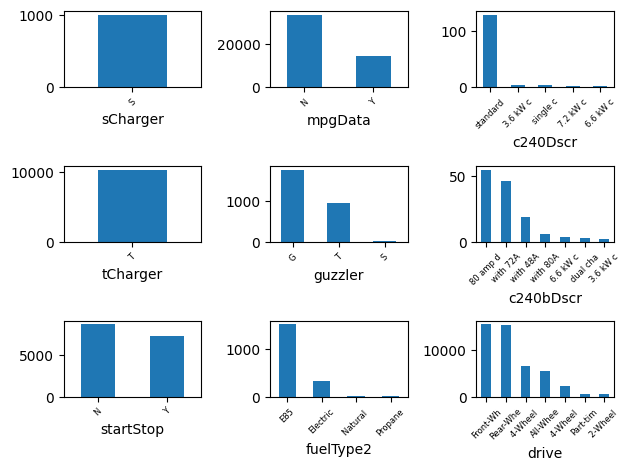

In [60]:
low_card = df.select_dtypes(include=["string"]).nunique().sort_values().iloc[:9].index
fig, axes = plt.subplots(nrows=3, ncols=3)

for index, column in enumerate(low_card):
    row = index % 3
    col = index // 3
    ax = axes[row][col]
    counts = df[column].value_counts()
    counts.set_axis(counts.index.str[:8]).plot(kind="bar", ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=6)

plt.tight_layout()

## Exploring continuous data



### How to do it



In [61]:
df = pd.read_csv(
    "data/vehicles.csv.zip",
    dtype_backend="numpy_nullable",
    dtype={
        "rangeA": pd.StringDtype(),
        "mfrCode": pd.StringDtype(),
        "c240Dscr": pd.StringDtype(),
        "c240bDscr": pd.StringDtype()
    }
)
df.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,14.167143,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,<NA>,<NA>,0.0,<NA>,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,<NA>,0,0,0
1,27.046364,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,<NA>,<NA>,0.0,<NA>,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,<NA>,0,0,0
2,11.018889,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,<NA>,<NA>,0.0,<NA>,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,<NA>,0,0,0
3,27.046364,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,<NA>,<NA>,0.0,<NA>,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,<NA>,0,0,0
4,15.658421,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,<NA>,<NA>,0.0,<NA>,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,<NA>,0,0,0


In [62]:
df.select_dtypes(exclude=["string"]).columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'engId', 'feScore', 'fuelCost08', 'fuelCostA08', 'ghgScore',
       'ghgScoreA', 'highway08', 'highway08U', 'highwayA08', 'highwayA08U',
       'highwayCD', 'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4',
       'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity', 'rangeCityA',
       'rangeHwy', 'rangeHwyA', 'UCity', 'UCityA', 'UHighway', 'UHighwayA',
       'year', 'youSaveSpend', 'charge240b', 'phevCity', 'phevHwy',
       'phevComb'],
      dtype='object')

In [63]:
df.select_dtypes(
    exclude=["string"]
).pipe(pd.isna).sum().sort_values(ascending=False).head()

cylinders      801
displ          799
barrels08        0
pv4              0
highwayA08U      0
dtype: int64

In [64]:
df.loc[df["cylinders"].isna(), ["make", "model"]].value_counts()

make      model                          
Fiat      500e                               8
smart     fortwo electric drive coupe        7
Toyota    RAV4 EV                            7
Nissan    Leaf                               7
Ford      Focus Electric                     7
                                            ..
Polestar  2 Single Motor (19 Inch Wheels)    1
Ford      Mustang Mach-E RWD LFP             1
Polestar  2 Dual Motor Performance Pack      1
          2 Dual Motor Perf Pack             1
Acura     ZDX AWD                            1
Name: count, Length: 450, dtype: int64

In [65]:
df["cylinders"] = df["cylinders"].fillna(0)

In [66]:
df.loc[df["displ"].isna(), ["make", "model"]].value_counts()

make     model                             
Fiat     500e                                  8
smart    fortwo electric drive coupe           7
Toyota   RAV4 EV                               7
Nissan   Leaf                                  7
Ford     Focus Electric                        7
                                              ..
Porsche  Taycan 4S Performance Battery Plus    1
         Taycan GTS ST                         1
Fisker   Ocean Extreme One                     1
Fiat     500e All Season                       1
Acura    ZDX AWD                               1
Name: count, Length: 449, dtype: int64

In [67]:
df["displ"].nunique()

66

<Axes: ylabel='Frequency'>

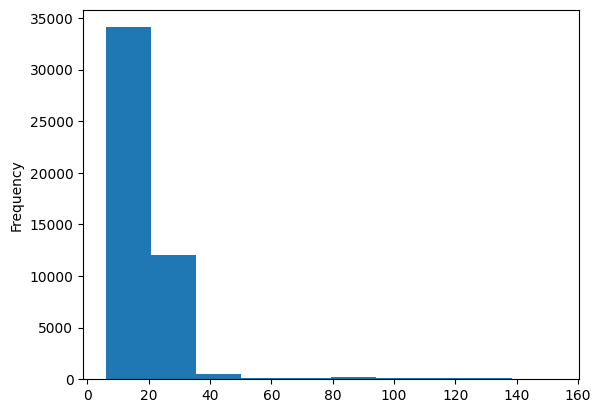

In [68]:
df["city08"].plot(kind="hist")

<Axes: ylabel='Frequency'>

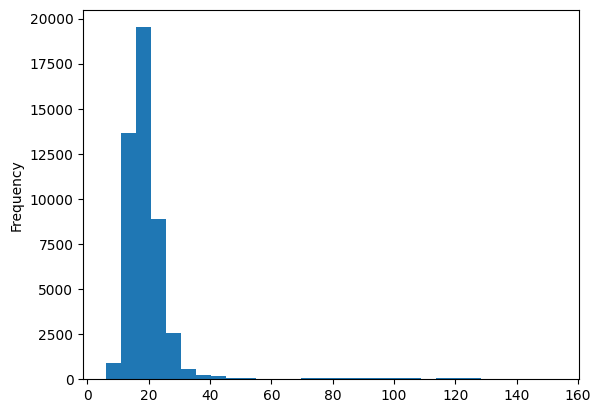

In [69]:
df["city08"].plot(kind="hist", bins=30)

Text(0, 0.5, 'highway')

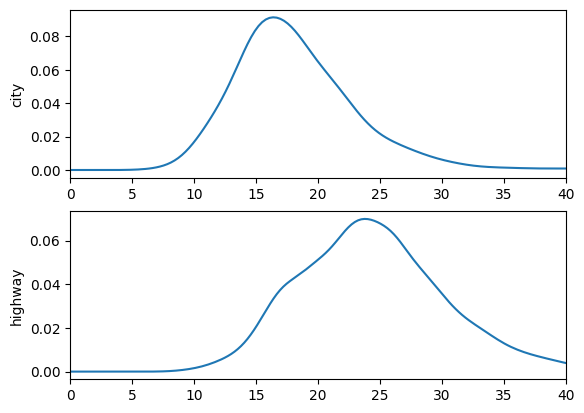

In [70]:
fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].set_xlim(0, 40)
axes[1].set_xlim(0, 40)

df["city08"].plot(kind="kde", ax=axes[0])
df["highway08"].plot(kind="kde", ax=axes[1])

axes[0].set_ylabel("city")
axes[1].set_ylabel("highway")

## Using seaborn for advanced plots



In [71]:
import seaborn as sns
sns.set_theme()
sns.set_style("white")

### How to do it



In [72]:
df = pd.DataFrame([
    ["Q1-2024", "project_a", 1],
    ["Q1-2024", "project_b", 1],
    ["Q2-2024", "project_a", 2],
    ["Q2-2024", "project_b", 2],
    ["Q3-2024", "project_a", 4],
    ["Q3-2024", "project_b", 3],
    ["Q4-2024", "project_a", 8],
    ["Q4-2024", "project_b", 4],
    ["Q1-2025", "project_a", 16],
    ["Q1-2025", "project_b", 5],
], columns=["quarter", "project", "github_stars"])
df = df.convert_dtypes(dtype_backend="numpy_nullable")

df

,quarter,project,github_stars
0,Q1-2024,project_a,1
1,Q1-2024,project_b,1
2,Q2-2024,project_a,2
3,Q2-2024,project_b,2
4,Q3-2024,project_a,4
5,Q3-2024,project_b,3
6,Q4-2024,project_a,8
7,Q4-2024,project_b,4
8,Q1-2025,project_a,16
9,Q1-2025,project_b,5


<Axes: xlabel='quarter', ylabel='github_stars'>

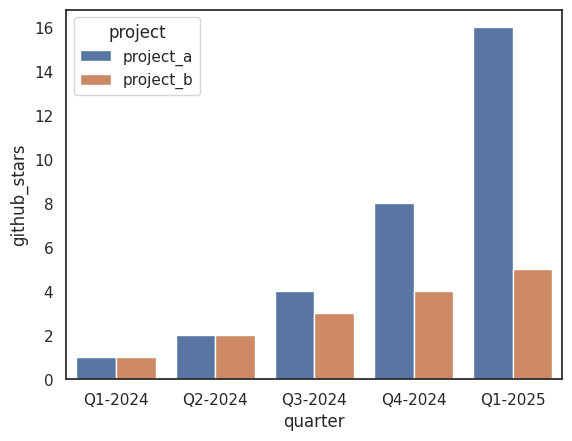

In [73]:
sns.barplot(df, x="quarter", y="github_stars", hue="project")

<Axes: xlabel='quarter', ylabel='github_stars'>

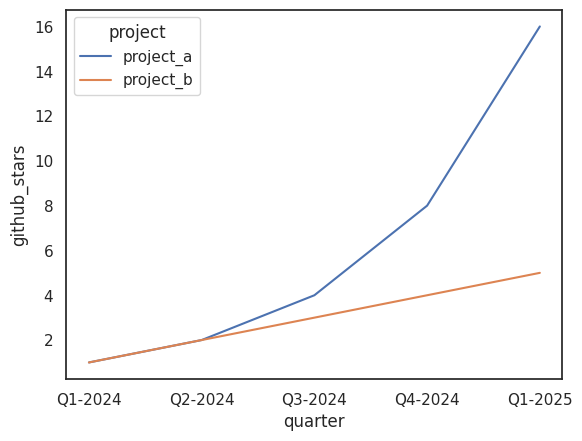

In [74]:
sns.lineplot(df, x="quarter", y="github_stars", hue="project")

In [75]:
df

,quarter,project,github_stars
0,Q1-2024,project_a,1
1,Q1-2024,project_b,1
2,Q2-2024,project_a,2
3,Q2-2024,project_b,2
4,Q3-2024,project_a,4
5,Q3-2024,project_b,3
6,Q4-2024,project_a,8
7,Q4-2024,project_b,4
8,Q1-2025,project_a,16
9,Q1-2025,project_b,5


In [76]:
df = pd.DataFrame({
    "project_a": [1, 2, 4, 8, 16],
    "project_b": [1, 2, 3, 4, 5],
}, index=["Q1-2024", "Q2-2024", "Q3-2024", "Q4-2024", "Q1-2025"])
df = df.convert_dtypes(dtype_backend="numpy_nullable")

df

,project_a,project_b
Q1-2024,1,1
Q2-2024,2,2
Q3-2024,4,3
Q4-2024,8,4
Q1-2025,16,5


In [77]:
df = pd.read_csv(
    "data/movie.csv",
    usecols=["movie_title", "title_year", "imdb_score", "content_rating"],
    dtype_backend="numpy_nullable",
)
df.head()

,movie_title,content_rating,title_year,imdb_score
0,Avatar,PG-13,2009.0,7.9
1,Pirates of the Caribbean: At World's End,PG-13,2007.0,7.1
2,Spectre,PG-13,2015.0,6.8
3,The Dark Knight Rises,PG-13,2012.0,8.5
4,Star Wars: Episode VII - The Force Awakens,<NA>,<NA>,7.1


In [78]:
df = pd.read_csv(
    "data/movie.csv",
    usecols=["movie_title", "title_year", "imdb_score", "content_rating"],
    dtype_backend="numpy_nullable",
    dtype={"title_year": pd.Int16Dtype()},
)
df.head()

,movie_title,content_rating,title_year,imdb_score
0,Avatar,PG-13,2009,7.9
1,Pirates of the Caribbean: At World's End,PG-13,2007,7.1
2,Spectre,PG-13,2015,6.8
3,The Dark Knight Rises,PG-13,2012,8.5
4,Star Wars: Episode VII - The Force Awakens,<NA>,<NA>,7.1


In [79]:
df["title_year"].min()

1916

In [80]:
df["title_year"].max()

2016

In [81]:
df = df.assign(
    title_decade=lambda x: pd.cut(x["title_year"],
                                  bins=range(1910, 2021, 10)))

df.head()

,movie_title,content_rating,title_year,imdb_score,title_decade
0,Avatar,PG-13,2009,7.9,"(2000.0, 2010.0]"
1,Pirates of the Caribbean: At World's End,PG-13,2007,7.1,"(2000.0, 2010.0]"
2,Spectre,PG-13,2015,6.8,"(2010.0, 2020.0]"
3,The Dark Knight Rises,PG-13,2012,8.5,"(2010.0, 2020.0]"
4,Star Wars: Episode VII - The Force Awakens,<NA>,<NA>,7.1,NaN


<Axes: xlabel='imdb_score', ylabel='title_decade'>

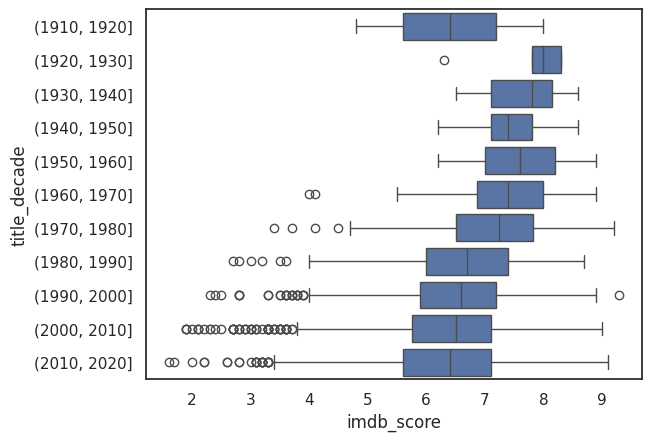

In [82]:
sns.boxplot(
    data=df,
    x="imdb_score",
    y="title_decade",
)

<Axes: xlabel='imdb_score', ylabel='title_decade'>

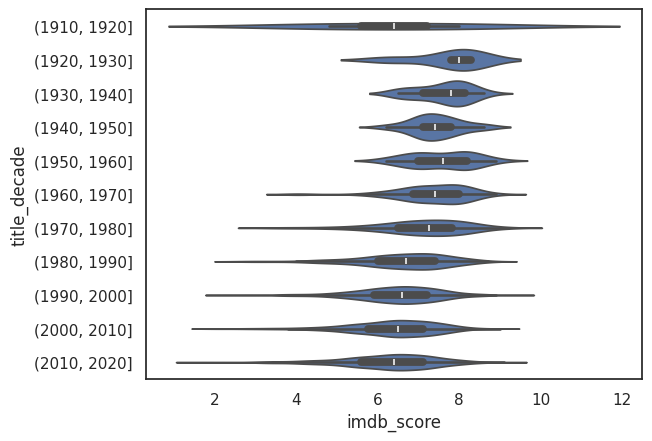

In [83]:
sns.violinplot(
    data=df,
    x="imdb_score",
    y="title_decade",
)

<Axes: xlabel='imdb_score', ylabel='title_decade'>

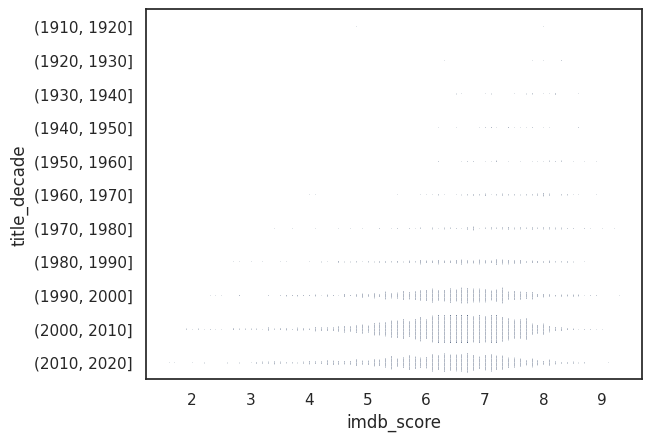

In [84]:
sns.swarmplot(
    data=df,
    x="imdb_score",
    y="title_decade",
    size=.25,
)

In [85]:
ratings_of_interest = {"G", "PG", "PG-13", "R"}
mask = (
    (df["title_year"] >= 2013)
    & (df["title_year"] <= 2015)
    & (df["content_rating"].isin(ratings_of_interest))
)
data = df[mask].assign(
    title_year=lambda x: x["title_year"].astype(pd.CategoricalDtype())
)
data.head()

,movie_title,content_rating,title_year,imdb_score,title_decade
2,Spectre,PG-13,2015,6.8,"(2010, 2020]"
8,Avengers: Age of Ultron,PG-13,2015,7.5,"(2010, 2020]"
14,The Lone Ranger,PG-13,2013,6.5,"(2010, 2020]"
15,Man of Steel,PG-13,2013,7.2,"(2010, 2020]"
20,The Hobbit: The Battle of the Five Armies,PG-13,2014,7.5,"(2010, 2020]"


<Axes: xlabel='imdb_score', ylabel='title_year'>

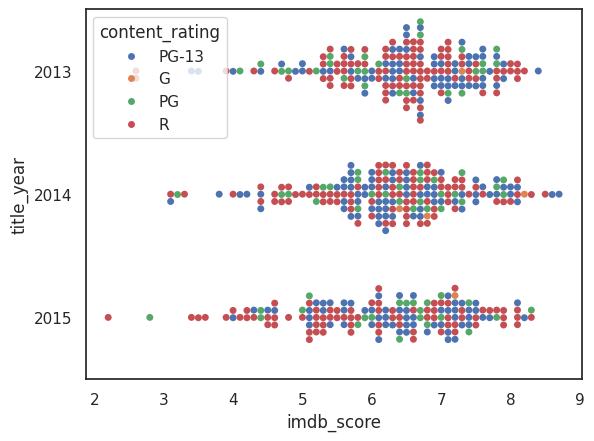

In [86]:
sns.swarmplot(
    data=data,
    x="imdb_score",
    y="title_year",
    hue="content_rating",
)

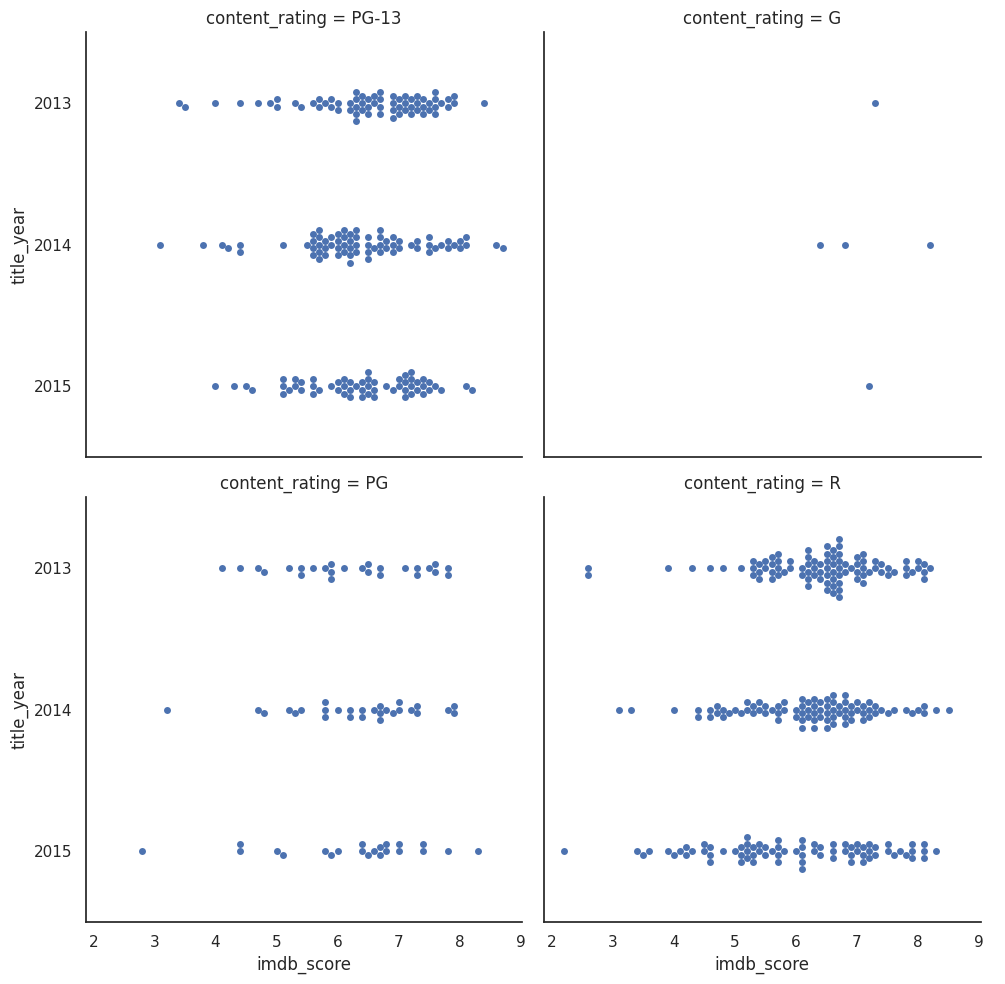

In [87]:
sns.catplot(
    kind="swarm",
    data=data,
    x="imdb_score",
    y="title_year",
    col="content_rating",
    col_wrap=2,
)